You've requested a detailed explanation of Principal Component Analysis (PCA) with plots. I've previously provided this in our conversation as part of the "Multivariate & Dimensionality Techniques" section.

Here's the detailed breakdown of Principal Component Analysis (PCA) again, with mathematical intuition, a problem statement, and illustrative plots:

-----

## 🔹 Principal Component Analysis (PCA)

**Explanation:**
Principal Component Analysis (PCA) is a widely used **dimensionality reduction technique**. Its main goal is to transform a large set of correlated variables into a smaller set of uncorrelated variables called **Principal Components (PCs)**. These new components capture the most variance in the data. The first PC captures the most variance, the second PC captures the second most variance (and is orthogonal to the first), and so on.

**Purpose:**

  * **Dimensionality Reduction:** Reduce the number of features while retaining most of the information. This is crucial for high-dimensional datasets where many features might be redundant or highly correlated.
  * **Noise Reduction:** By focusing on major components, less important variance (often considered noise) is typically discarded. This can lead to cleaner data for subsequent analysis.
  * **Data Visualization:** It can reduce high-dimensional data to 2 or 3 dimensions, making it possible to plot and visually explore patterns, clusters, or outliers that were otherwise hidden.
  * **Feature Engineering:** The Principal Components themselves can be used as new, independent features for other machine learning models (e.g., in regression, classification, or clustering), often leading to improved model performance and reduced overfitting.

**Mathematical Intuition:**
PCA essentially finds the directions (or axes) along which the data varies the most. These directions are the eigenvectors of the covariance matrix of your data.

1.  **Covariance Matrix:**

      * The covariance matrix is a square matrix that describes the variance of each variable and the covariance between each pair of variables.
      * For a dataset with $p$ features, the covariance matrix $\\Sigma$ will be a $p \\times p$ symmetric matrix.
      * Each diagonal element $\\Sigma\_{ii}$ represents the variance of feature $i$.
      * Each off-diagonal element $\\Sigma\_{ij}$ represents the covariance between feature $i$ and feature $j$.
      * A high positive covariance indicates that two variables tend to increase or decrease together. A high negative covariance indicates that as one variable increases, the other tends to decrease. If the covariance is near zero, it suggests little linear relationship between the variables.

    *Example for 2 variables ($X\_1, X\_2$):*
    $$\Sigma = \begin{pmatrix} \text{Var}(X_1) & \text{Cov}(X_1, X_2) \\ \text{Cov}(X_2, X_1) & \text{Var}(X_2) \end{pmatrix}$$
    The goal of PCA is to decorrelate the variables, so that in the new PC space, the covariance matrix becomes diagonal (all off-diagonal elements become zero).

2.  **Eigenvalues and Eigenvectors:**

      * **Eigenvectors:** These are special non-zero vectors that, when a linear transformation (like multiplying by the covariance matrix) is applied to them, only change by a scalar factor. They are fundamental to PCA because they represent the **principal components**. Each eigenvector defines a new axis in the data space. These axes are orthogonal (perpendicular) to each other, meaning they capture independent dimensions of variance.
      * **Eigenvalues:** The scalar factor by which an eigenvector is scaled is its corresponding eigenvalue. In PCA, eigenvalues quantify the **amount of variance** explained by each principal component. A larger eigenvalue means its corresponding eigenvector (principal component) captures more of the total variance in the data. The eigenvector with the largest eigenvalue is the first principal component, the one with the second largest eigenvalue is the second principal component, and so on.

    The core mathematical problem of PCA is to find the eigenvalues $\\lambda$ and eigenvectors $\\mathbf{v}$ for a covariance matrix $\\Sigma$ such that:
    $$\Sigma \mathbf{v} = \lambda \mathbf{v}$$

3.  **Steps of PCA:**

    1.  **Standardize the Data:** (Crucial for most applications) If your variables have different scales (e.g., one measured in dollars, another in years), standardize them to have zero mean and unit variance. This prevents variables with larger scales from dominating the principal components, ensuring that variance is given equal importance across all features.
        $$z = \frac{x - \mu}{\sigma}$$
    2.  **Compute the Covariance Matrix:** Calculate the covariance matrix of the standardized data. This matrix reveals the relationships (covariances) between all pairs of your features.
    3.  **Calculate Eigenvalues and Eigenvectors:** Perform eigen decomposition on the covariance matrix. This mathematical operation yields the set of eigenvalues and their corresponding eigenvectors.
    4.  **Sort Eigenvalues:** Order the eigenvalues from largest to smallest. The corresponding eigenvectors are now the principal components, ordered by the amount of variance they explain.
    5.  **Select Principal Components:** Choose a subset of principal components (eigenvectors) corresponding to the largest eigenvalues. The number of components to retain can be decided based on:
          * **Explained Variance Threshold:** Retain enough components to explain a certain percentage of the total variance (e.g., 90% or 95%).
          * **Scree Plot:** (See below) Look for an "elbow" in the plot.
          * **Fixed Number:** Choose a specific number (e.g., 2 or 3 for visualization).
    6.  **Transform Data:** Project the original (standardized) data onto the selected principal components. This creates a new, lower-dimensional representation of your data where the new features (PCs) are uncorrelated.

**Scree Plot:**
A **Scree plot** is a line plot of the eigenvalues (or the proportion of variance explained) of principal components in descending order. It's a visual tool used to help determine the "optimal" number of components to retain. You typically look for an "elbow" point in the plot where the slope of the line dramatically changes (becomes much flatter). This suggests that components after this point contribute much less significantly to explaining the total variance and might represent noise rather than meaningful structure.

**Problem Statement:**

  * **Problem:** A retail company has collected data on 10 different customer engagement metrics (e.g., website visits, average time on site, number of purchases, items viewed, newsletter clicks, customer service interactions, bounce rate, etc.). These metrics are often highly correlated. They want to understand the underlying patterns of customer engagement, reduce the dimensionality of this data to simplify analysis, and potentially build a more robust customer segmentation model, as having 10 correlated features is complex for visualization and modeling.
  * **PCA Application:** PCA can identify the few principal components that capture most of the variation in these 10 metrics. For example, PC1 might represent "overall customer activity," PC2 might represent "engagement with promotional content," and PC3 "customer service dependency." By reducing the data to 2 or 3 principal components, the company can visualize customer segments more easily, or use these new uncorrelated features in subsequent clustering or predictive models, potentially improving performance and interpretability.


--- Principal Component Analysis (PCA) ---
Original Data Head (First 5 rows):
   Website_Visits  Time_On_Site  Newsletter_Clicks  Promo_Conversions  \
0       54.967142     36.896860          32.862299          16.401399   
1       48.617357     36.790659          34.486276          18.451042   
2       56.476885     43.467936          38.664410          26.187820   
3       65.230299     48.172853          38.430416          25.499731   
4       47.658466     37.320344          18.978645          11.303581   

   Customer_Service_Calls  
0               50.866868  
1               62.807500  
2               70.062924  
3               70.563767  
4               64.599214  

Original Data Covariance Matrix (demonstrates correlations):
                        Website_Visits  Time_On_Site  Newsletter_Clicks  \
Website_Visits               82.476989     60.073882          15.033780   
Time_On_Site                 60.073882     66.070050          10.511866   
Newsletter_Clicks           

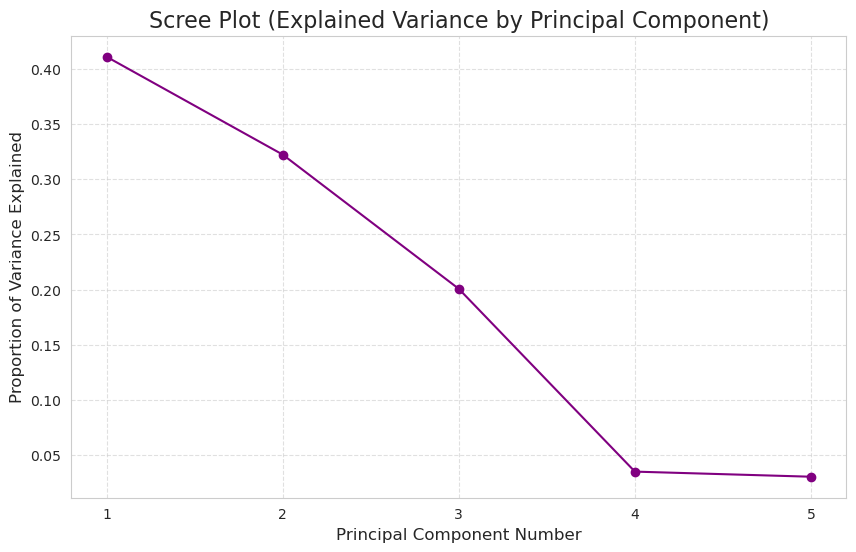

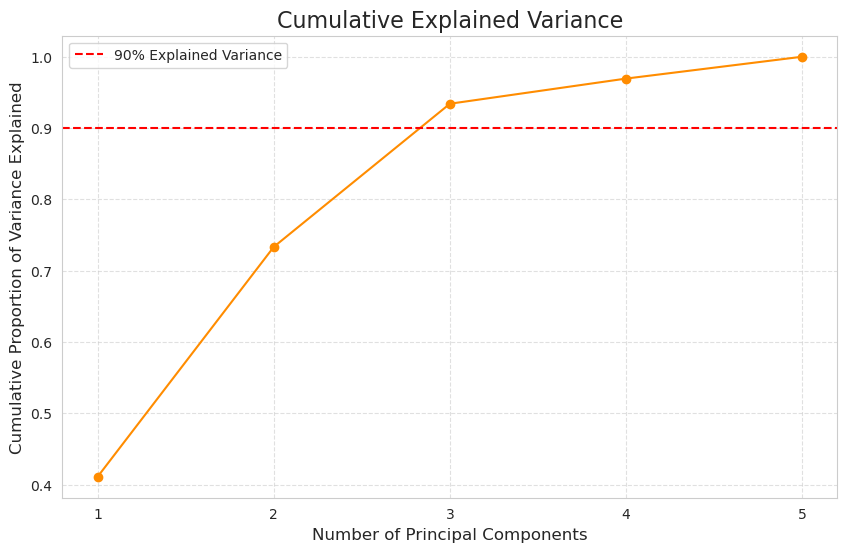


Transformed Data (First 2 Principal Components) Head:
   Principal Component 1  Principal Component 2
0               0.329634              -0.347166
1               0.110852               0.325155
2               1.715961               0.431588
3               2.423823              -0.396480
4              -1.404664              -1.100460


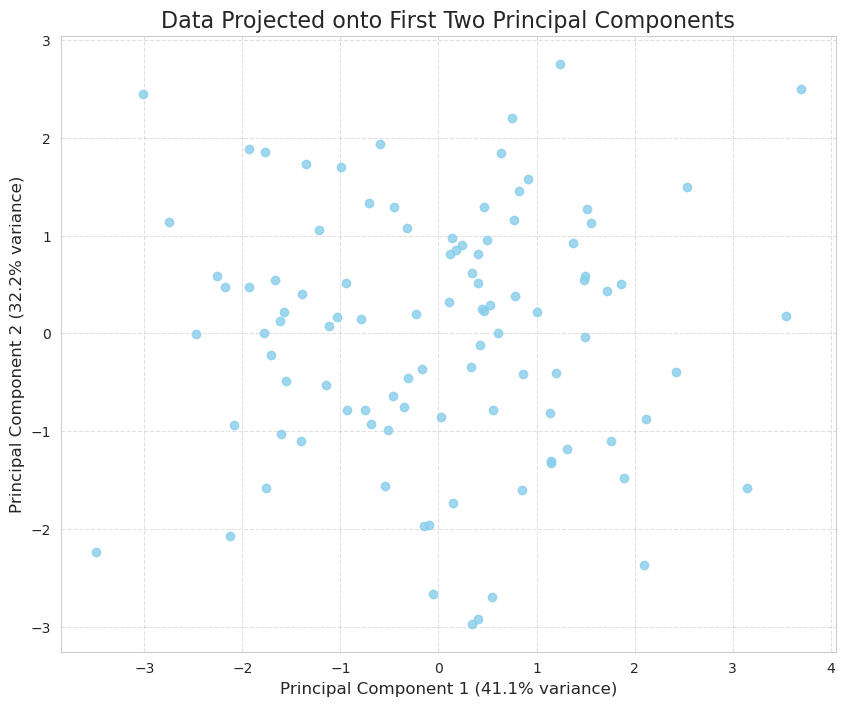


Eigenvectors (Loadings) for the first 2 Principal Components:
                             PC1       PC2
Website_Visits          0.511123 -0.481480
Time_On_Site            0.484428 -0.500822
Newsletter_Clicks       0.531243  0.459490
Promo_Conversions       0.458059  0.549556
Customer_Service_Calls -0.109755  0.064897


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans'] # Or your preferred sans-serif font

print("--- Principal Component Analysis (PCA) ---")

# 1. Simulate some correlated data (e.g., customer metrics)
np.random.seed(42) # For reproducibility
data_size = 100
num_features = 5 # Simulating 5 customer engagement metrics

# Create features with varying degrees of correlation
# Feature 1 (Base Activity)
feature1 = np.random.normal(50, 10, data_size)
# Feature 2 (Highly correlated with Feature 1, e.g., 'Time on Site' vs 'Website Visits')
feature2 = feature1 * 0.8 + np.random.normal(0, 5, data_size)
# Feature 3 (Another base, e.g., 'Newsletter Clicks')
feature3 = np.random.normal(30, 8, data_size)
# Feature 4 (Correlated with Feature 3, e.g., 'Promotion Conversions' vs 'Newsletter Clicks')
feature4 = feature3 * 0.6 + np.random.normal(0, 4, data_size)
# Feature 5 (Less correlated, e.g., 'Customer Service Calls')
feature5 = np.random.normal(70, 12, data_size) 

df_pca = pd.DataFrame({
    'Website_Visits': feature1,
    'Time_On_Site': feature2,
    'Newsletter_Clicks': feature3,
    'Promo_Conversions': feature4,
    'Customer_Service_Calls': feature5
})

print("Original Data Head (First 5 rows):")
print(df_pca.head())
print("\nOriginal Data Covariance Matrix (demonstrates correlations):")
print(df_pca.cov())

# 2. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)
scaled_df = pd.DataFrame(scaled_data, columns=df_pca.columns)
print("\nScaled Data Head (First 5 rows):")
print(scaled_df.head())
print("\nScaled Data Covariance Matrix (demonstrates correlations on standardized scale):")
print(scaled_df.cov()) # Now variances are ~1, but covariances (correlations) still exist

# 3. Perform PCA
pca = PCA(n_components=None) # Keep all components initially to analyze variance
pca.fit(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"\nExplained Variance Ratio by each Principal Component: {explained_variance_ratio}")
print(f"Cumulative Explained Variance: {np.cumsum(explained_variance_ratio)}")

# --- Plotting: Scree Plot ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='purple')
plt.title('Scree Plot (Explained Variance by Principal Component)', fontsize=16)
plt.xlabel('Principal Component Number', fontsize=12)
plt.ylabel('Proportion of Variance Explained', fontsize=12)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- Plotting: Cumulative Explained Variance ---
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='-', color='darkorange')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Explained Variance')
plt.title('Cumulative Explained Variance', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Proportion of Variance Explained', fontsize=12)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Project data onto the first 2 principal components for visualization
# Based on the scree plot, we might choose 2 or 3 components if they explain enough variance.
# Here, we project to 2D for easy visualization.
pca_2d = PCA(n_components=2)
principal_components = pca_2d.fit_transform(scaled_data)
df_pca_2d = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

print("\nTransformed Data (First 2 Principal Components) Head:")
print(df_pca_2d.head())

# --- Plotting: Data Projected onto First Two Principal Components ---
plt.figure(figsize=(10, 8))
plt.scatter(df_pca_2d['Principal Component 1'], df_pca_2d['Principal Component 2'], alpha=0.8, color='skyblue')
plt.title('Data Projected onto First Two Principal Components', fontsize=16)
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1]*100:.1f}% variance)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- Display Eigenvectors (Loadings) for the first two components ---
# These show how much each original feature contributes to each principal component.
# The sign indicates direction of correlation.
print("\nEigenvectors (Loadings) for the first 2 Principal Components:")
# Each column is a PC, each row is an original feature
loadings_df = pd.DataFrame(pca_2d.components_.T, columns=['PC1', 'PC2'], index=df_pca.columns)
print(loadings_df)


In [2]:
# Interpretation of Loadings:
# - For PC1, 'Website_Visits' and 'Time_On_Site' have high positive loadings,
#   suggesting PC1 represents a general 'Activity Level'.
# - For PC2, 'Newsletter_Clicks' and 'Promo_Conversions' have high positive loadings,
#   suggesting PC2 represents 'Promotional Engagement'.
# - 'Customer_Service_Calls' might have lower loadings on these main PCs,
#   or higher on subsequent PCs if retained.




**Interpretation of PCA Plots:**

  * **Scree Plot:** This plot helps you decide how many principal components to keep. You'd look for an "elbow" in the graph. In our example, PC1 explains a large chunk, PC2 explains a bit less but still significant. After PC2, the drop in explained variance is less steep, suggesting that 2 or 3 components might be sufficient.
  * **Cumulative Explained Variance Plot:** This plot directly shows the total percentage of variance explained by keeping a certain number of principal components. For instance, you might see that keeping 2 components explains 75% of the total variance, and 3 components explain 90%. This helps you balance dimensionality reduction with information retention.
  * **Data Projected onto First Two Principal Components Plot:** This is a scatter plot of your data points in the new, lower-dimensional space defined by PC1 and PC2. This visualization is particularly useful for identifying clusters, trends, or outliers that might have been obscured in the original high-dimensional space. The axes are the principal components, and they are orthogonal, reflecting the uncorrelated nature of the new features.


# Standardization vs. Normalization: Understanding Their Impact with Plots

This notebook provides a detailed explanation of Standardization and Normalization, two crucial data preprocessing techniques. It visually demonstrates their effects on data distributions, particularly highlighting how they handle outliers.

## Introduction to Feature Scaling

In machine learning and statistical analysis, numerical features often come in different scales and units (e.g., age in years, income in thousands of dollars). Algorithms that rely on distance calculations (like K-Nearest Neighbors, Support Vector Machines, K-means clustering) or gradient descent (like Linear Regression, Neural Networks) can be heavily biased by features with larger scales, causing them to dominate the learning process.

**Feature scaling** is the process of transforming numerical data into a common scale without distorting differences in the ranges of values. Standardization and Normalization are the two most common methods for this.

---

## 1. Standardization (Z-score Scaling)

**Explanation:**
**Standardization** (also known as Z-score normalization) transforms data to have a **mean of 0** and a **standard deviation of 1**. This process centers the data around its mean and scales it by its variability.

**Formula:**
For a data point $x$, its standardized value $z$ is calculated as:
$$z = \frac{x - \mu}{\sigma}$$
Where:
* $x$: The original value of the data point.
* $\mu$: The mean of the feature (column).
* $\sigma$: The standard deviation of the feature (column).

**Mathematical Intuition:**
Standardization essentially measures how many standard deviations away from the mean a data point is. This makes all features contribute equally to the distance calculations in algorithms. It shifts the distribution so that its center is at 0 and scales its spread to 1. **The shape of the original distribution is preserved.**

**When to Use Standardization:**
* **Algorithms sensitive to feature scales and/or assuming normality:** Many machine learning algorithms, especially those that use distance calculations or assume a normal distribution, perform better with standardized data. Examples include:
    * **K-Nearest Neighbors (KNN)**
    * **Support Vector Machines (SVM)**
    * **Linear and Logistic Regression**
    * **Neural Networks** (can help with faster convergence)
    * **Principal Component Analysis (PCA)**: PCA is sensitive to the variance of features. Standardizing ensures that features with larger scales don't disproportionately influence the principal components.
* **Data with outliers:** Standardization is generally more robust to outliers than Min-Max Normalization because it uses the mean and standard deviation, which are less affected by extreme values than the min and max. The outlier will still be an outlier, but its distance from the mean will be expressed in standard deviations.
* **Data with a Gaussian (Normal) distribution:** While not strictly required, standardization works well when the data is approximately normally distributed.

---

## 2. Normalization (Min-Max Scaling)

**Explanation:**
**Normalization** (most commonly **Min-Max Scaling**) rescales numerical features to a **fixed, predefined range**, typically between 0 and 1. It transforms the data by shifting the range of values so that the minimum value becomes 0 and the maximum value becomes 1.

**Formula (Min-Max Scaling):**
For a data point $x$, its normalized value $x'$ is calculated as:
$$x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}$$
Where:
* $x$: The original value of the data point.
* $\text{min}(x)$: The minimum value of the feature (column).
* $\text{max}(x)$: The maximum value of the feature (column).

**Mathematical Intuition:**
Normalization compresses the entire range of the data into a specific interval. It's like fitting all your data points into a box of a specific size (e.g., 0 to 1). This is useful when you need to constrain the values within a certain boundary. **The shape of the original distribution is preserved,** but the scale is completely changed to fit the new range.

**When to Use Normalization:**
* **Algorithms that don't assume a specific distribution:**
    * **Neural Networks:** Normalization (especially to [0,1] or [-1,1]) is often preferred as it can lead to faster convergence and better performance by preventing large input values from saturating activation functions.
    * **K-Nearest Neighbors (KNN):** While standardization also works, normalization can be used if the absolute scale of features within a bounded range is important.
* **When you need values within a specific range:** For example, image processing where pixel intensities are often normalized to [0, 1].
* **When the data distribution is unknown or not Gaussian:** Normalization makes no assumptions about the distribution of the data.
* **When outliers are NOT a major concern:** Normalization is highly sensitive to outliers. A single extreme outlier can compress the majority of the non-outlier data into a very small range (e.g., 0 to 0.1), reducing its variability and making it difficult for the model to distinguish between these compressed values.

---

## Key Differences & Visual Impact

Let's use a simulated dataset to visually understand the impact of these transformations. We'll create a feature with a clear outlier to demonstrate sensitivity.


--- Visualizing Standardization vs. Normalization ---
Original Data Head:
   Feature_A  Feature_B  Feature_C_With_Outlier
0  54.967142          9               10.217424
1  48.617357         62               10.211527
2  56.476885         37               11.841333
3  65.230299         97                9.546555
4  47.658466         51               11.306097

Original Data Descriptive Statistics:
        Feature_A   Feature_B  Feature_C_With_Outlier
count  100.000000  100.000000              100.000000
mean    48.961535   49.660000               15.915632
std      9.081684   31.001212               28.389140
min     23.802549    1.000000                4.241086
25%     43.990943   20.000000                8.238917
50%     48.730437   52.000000                9.990447
75%     54.059521   73.500000               11.708796
max     68.522782   99.000000              200.000000


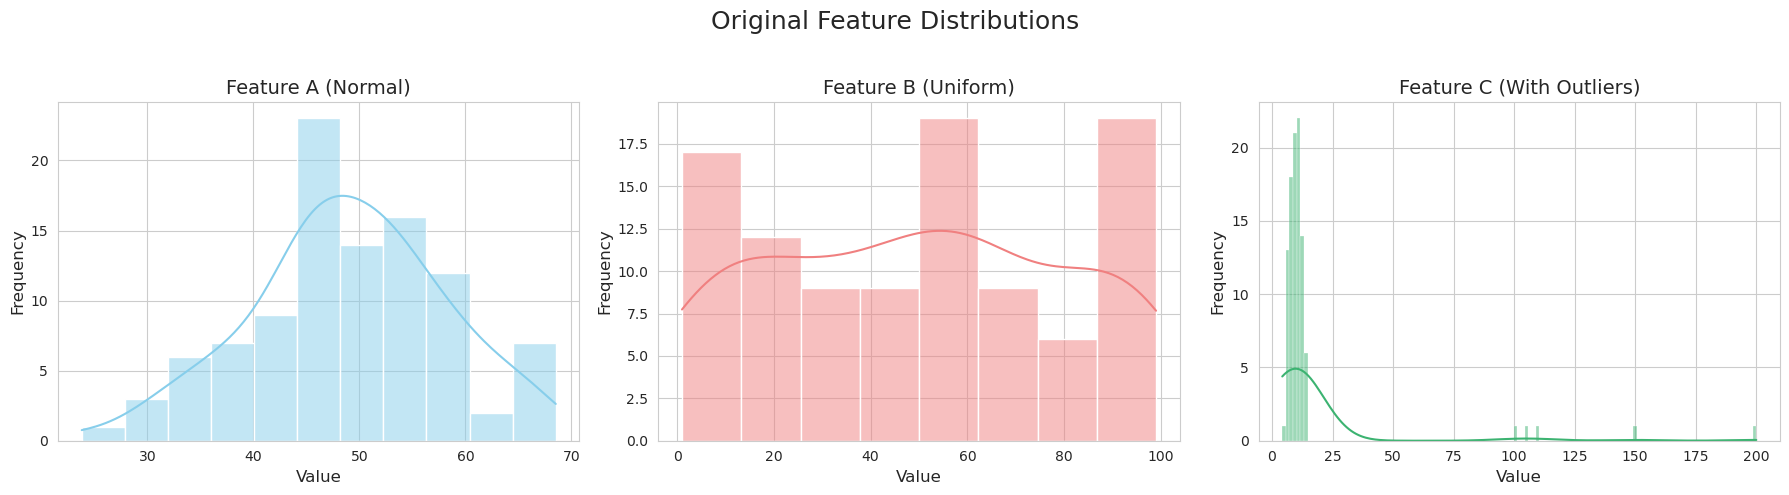


Standardized Data Head:
   Feature_A  Feature_B  Feature_C_With_Outlier
0   0.664619  -1.318169               -0.201729
1  -0.038089   0.400054               -0.201938
2   0.831697  -0.410428               -0.144239
3   1.800406   1.534730               -0.225479
4  -0.144206   0.043442               -0.163188

Standardized Data Descriptive Statistics (Mean ~0, Std Dev ~1):
          Feature_A     Feature_B  Feature_C_With_Outlier
count  1.000000e+02  1.000000e+02            1.000000e+02
mean  -1.156020e-15  1.072753e-16            4.440892e-17
std    1.005038e+00  1.005038e+00            1.005038e+00
min   -2.784256e+00 -1.577523e+00           -4.133045e-01
25%   -5.500777e-01 -9.615566e-01           -2.717725e-01
50%   -2.557477e-02  7.586118e-02           -2.097645e-01
75%    5.641760e-01  7.728763e-01           -1.489312e-01
max    2.164774e+00  1.599569e+00            6.516990e+00


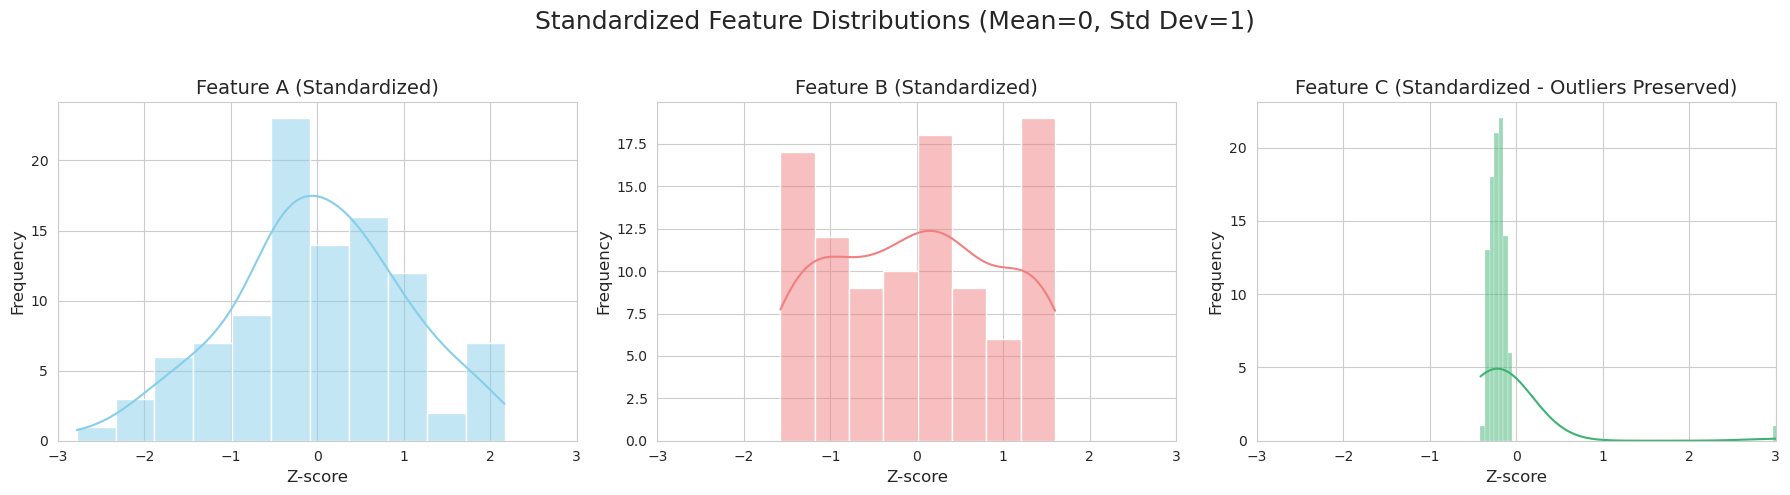


Normalized Data Head:
   Feature_A  Feature_B  Feature_C_With_Outlier
0   0.696879   0.081633                0.030529
1   0.554890   0.622449                0.030499
2   0.730639   0.367347                0.038825
3   0.926376   0.979592                0.027102
4   0.533448   0.510204                0.036090

Normalized Data Descriptive Statistics (Min=0, Max=1):
        Feature_A   Feature_B  Feature_C_With_Outlier
count  100.000000  100.000000              100.000000
mean     0.562586    0.496531                0.059637
std      0.203078    0.316339                0.145021
min      0.000000    0.000000                0.000000
25%      0.451438    0.193878                0.020422
50%      0.557419    0.520408                0.029370
75%      0.676583    0.739796                0.038147
max      1.000000    1.000000                1.000000


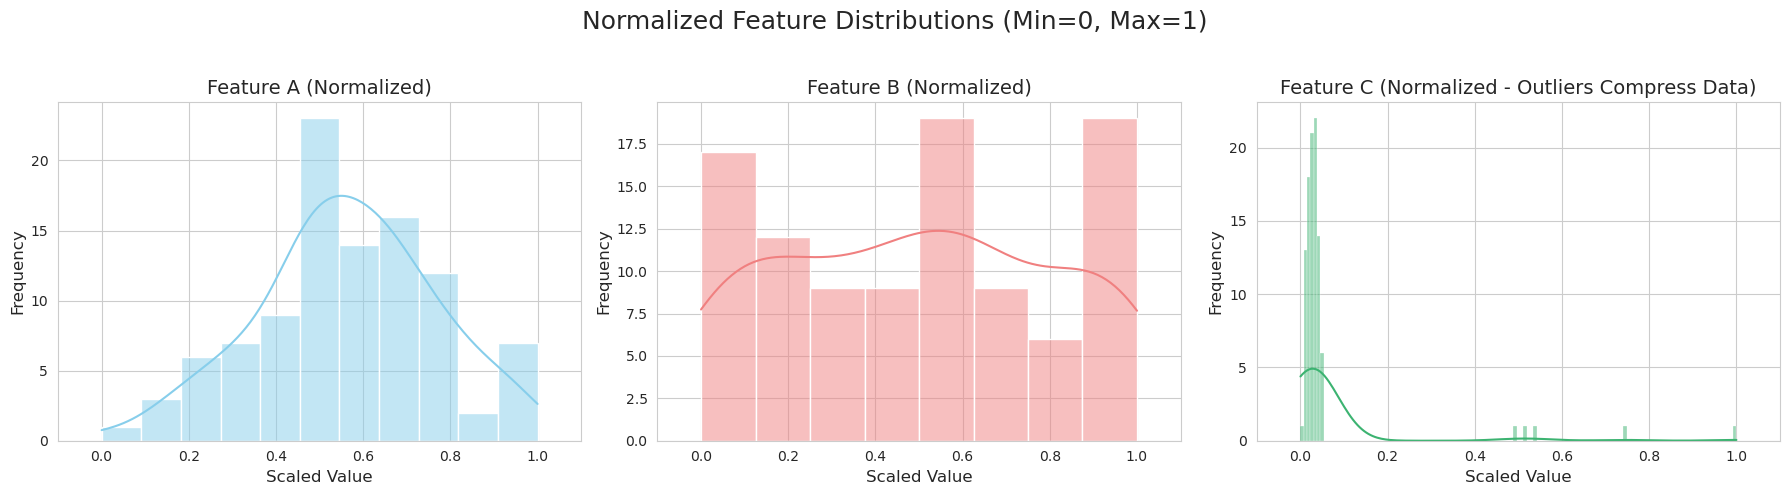

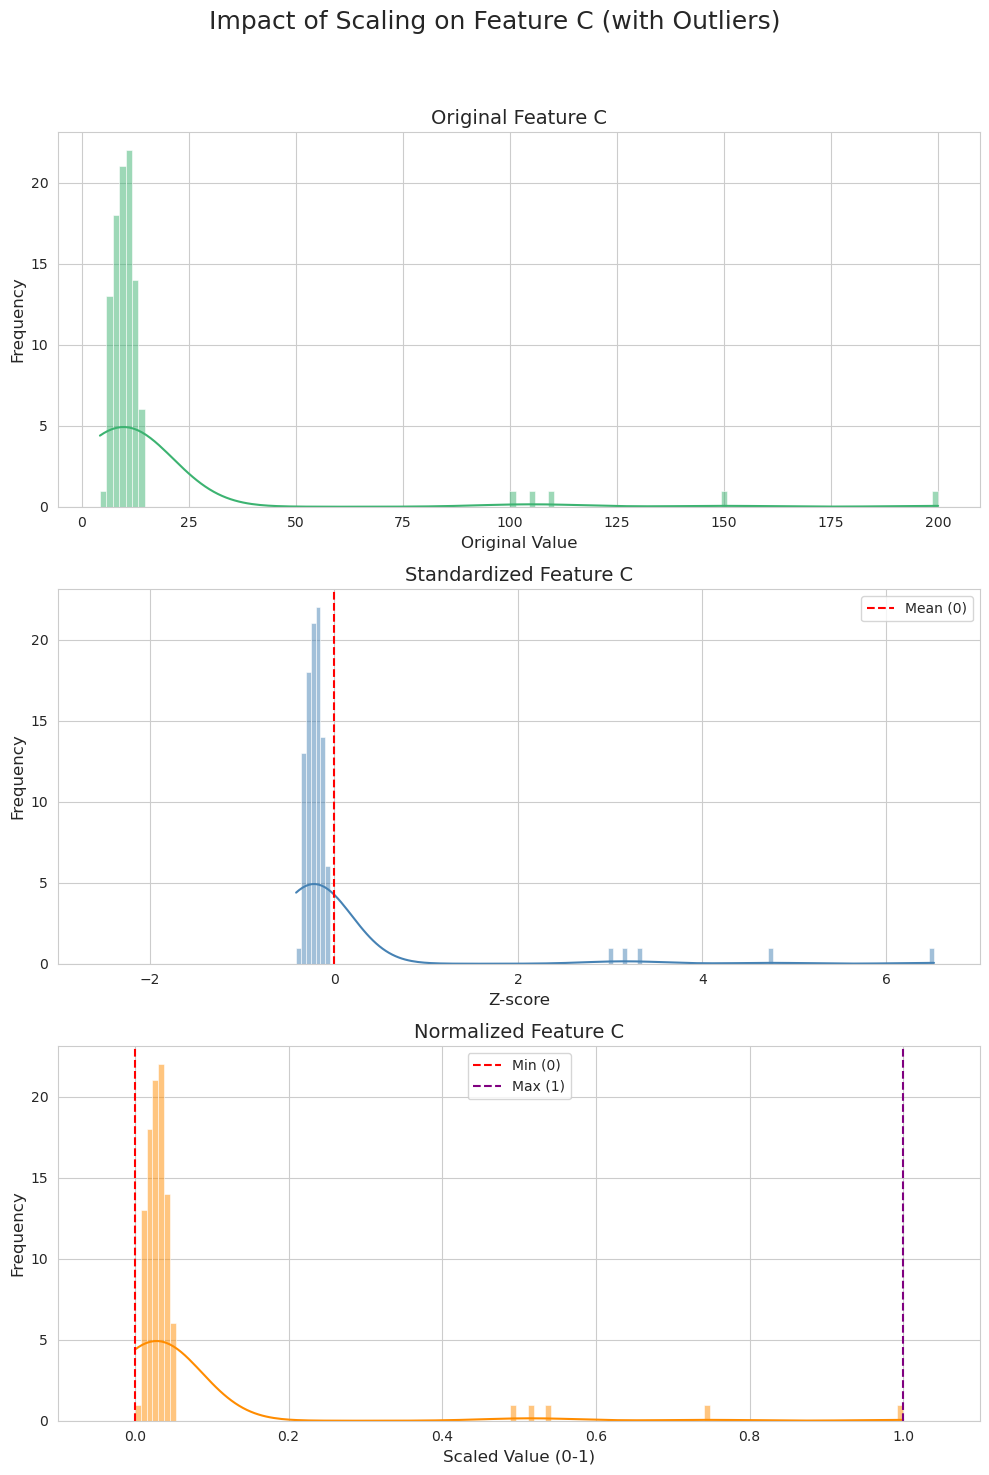


--- Summary of Differences ---
| Feature             | Standardization (Z-score Scaling)                               | Normalization (Min-Max Scaling)                                  |
| :------------------ | :-------------------------------------------------------------- | :--------------------------------------------------------------- |
| **Formula** | $z = (x - \mu) / \sigma$                                        | $x' = (x - \text{min}(x)) / (\text{max}(x) - \text{min}(x))$     |
| **Resulting Scale** | Mean = 0, Standard Deviation = 1                                | Fixed range, typically [0, 1] (or [-1, 1])                       |
| **Distribution** | Preserves the shape of the original distribution.              | Preserves the shape of the original distribution.                |
| **Outlier Sensitivity** | Less sensitive to outliers (uses mean & std dev).             | Highly sensitive to outliers (uses min & max, which are affected). |
| **Data Distribution Assumption**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

print("--- Visualizing Standardization vs. Normalization ---")

# 1. Create a sample dataset with an outlier
np.random.seed(42)
data = {
    'Feature_A': np.random.normal(50, 10, 100), # Normally distributed
    'Feature_B': np.random.randint(1, 100, 100), # Uniformly distributed
    'Feature_C_With_Outlier': np.concatenate([np.random.normal(10, 2, 95), [100, 105, 110, 150, 200]]) # Data with a few outliers
}
df = pd.DataFrame(data)

print("Original Data Head:")
print(df.head())
print("\nOriginal Data Descriptive Statistics:")
print(df.describe())

# --- Plotting Original Distributions ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Original Feature Distributions', fontsize=18)

sns.histplot(df['Feature_A'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Feature A (Normal)', fontsize=14)
axes[0].set_xlabel('Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(df['Feature_B'], kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Feature B (Uniform)', fontsize=14)
axes[1].set_xlabel('Value', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

sns.histplot(df['Feature_C_With_Outlier'], kde=True, ax=axes[2], color='mediumseagreen')
axes[2].set_title('Feature C (With Outliers)', fontsize=14)
axes[2].set_xlabel('Value', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# --- Apply Standardization ---
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)

print("\nStandardized Data Head:")
print(df_standardized.head())
print("\nStandardized Data Descriptive Statistics (Mean ~0, Std Dev ~1):")
print(df_standardized.describe())

# --- Plotting Standardized Distributions ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Standardized Feature Distributions (Mean=0, Std Dev=1)', fontsize=18)

sns.histplot(df_standardized['Feature_A'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Feature A (Standardized)', fontsize=14)
axes[0].set_xlabel('Z-score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_xlim(-3, 3) # Common range for standardized data

sns.histplot(df_standardized['Feature_B'], kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Feature B (Standardized)', fontsize=14)
axes[1].set_xlabel('Z-score', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_xlim(-3, 3)

sns.histplot(df_standardized['Feature_C_With_Outlier'], kde=True, ax=axes[2], color='mediumseagreen')
axes[2].set_title('Feature C (Standardized - Outliers Preserved)', fontsize=14)
axes[2].set_xlabel('Z-score', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
# Notice outliers are still far from mean (0), maintaining their relative position
axes[2].set_xlim(-3, 3) # May need to adjust if outliers are extremely far

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# --- Apply Normalization (Min-Max Scaling) ---
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)

print("\nNormalized Data Head:")
print(df_normalized.head())
print("\nNormalized Data Descriptive Statistics (Min=0, Max=1):")
print(df_normalized.describe())

# --- Plotting Normalized Distributions ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Normalized Feature Distributions (Min=0, Max=1)', fontsize=18)

sns.histplot(df_normalized['Feature_A'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Feature A (Normalized)', fontsize=14)
axes[0].set_xlabel('Scaled Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_xlim(-0.1, 1.1) # Ensure range is visible

sns.histplot(df_normalized['Feature_B'], kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Feature B (Normalized)', fontsize=14)
axes[1].set_xlabel('Scaled Value', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_xlim(-0.1, 1.1)

sns.histplot(df_normalized['Feature_C_With_Outlier'], kde=True, ax=axes[2], color='mediumseagreen')
axes[2].set_title('Feature C (Normalized - Outliers Compress Data)', fontsize=14)
axes[2].set_xlabel('Scaled Value', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
# Notice how the non-outlier data is squashed into a very small range near 0
axes[2].set_xlim(-0.1, 1.1)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# --- Direct Comparison of Feature C (with Outlier) ---
# This plot clearly shows the impact of outliers on each method
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=False)
fig.suptitle('Impact of Scaling on Feature C (with Outliers)', fontsize=18)

# Original
sns.histplot(df['Feature_C_With_Outlier'], kde=True, ax=axes[0], color='mediumseagreen')
axes[0].set_title('Original Feature C', fontsize=14)
axes[0].set_xlabel('Original Value', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Standardized
sns.histplot(df_standardized['Feature_C_With_Outlier'], kde=True, ax=axes[1], color='steelblue')
axes[1].set_title('Standardized Feature C', fontsize=14)
axes[1].set_xlabel('Z-score', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
# Set x-limits to show the outlier's position relative to the bulk
axes[1].set_xlim(-3, df_standardized['Feature_C_With_Outlier'].max() + 0.5)
axes[1].axvline(df_standardized['Feature_C_With_Outlier'].mean(), color='red', linestyle='--', label='Mean (0)')
axes[1].legend()


# Normalized
sns.histplot(df_normalized['Feature_C_With_Outlier'], kde=True, ax=axes[2], color='darkorange')
axes[2].set_title('Normalized Feature C', fontsize=14)
axes[2].set_xlabel('Scaled Value (0-1)', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
# Set x-limits to show the compression
axes[2].set_xlim(-0.1, 1.1)
axes[2].axvline(df_normalized['Feature_C_With_Outlier'].min(), color='red', linestyle='--', label='Min (0)')
axes[2].axvline(df_normalized['Feature_C_With_Outlier'].max(), color='purple', linestyle='--', label='Max (1)')
axes[2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("\n--- Summary of Differences ---")
print("| Feature             | Standardization (Z-score Scaling)                               | Normalization (Min-Max Scaling)                                  |")
print("| :------------------ | :-------------------------------------------------------------- | :--------------------------------------------------------------- |")
print("| **Formula** | $z = (x - \\mu) / \\sigma$                                        | $x' = (x - \\text{min}(x)) / (\\text{max}(x) - \\text{min}(x))$     |")
print("| **Resulting Scale** | Mean = 0, Standard Deviation = 1                                | Fixed range, typically [0, 1] (or [-1, 1])                       |")
print("| **Distribution** | Preserves the shape of the original distribution.              | Preserves the shape of the original distribution.                |")
print("| **Outlier Sensitivity** | Less sensitive to outliers (uses mean & std dev).             | Highly sensitive to outliers (uses min & max, which are affected). |")
print("| **Data Distribution Assumption** | Often preferred when data is approximately Gaussian/Normal. | No assumption about data distribution.                           |")
print("| **Bounded Range** | Not bounded to a specific range (can have values outside [-3, 3]). | Bounded to a specific range (e.g., [0, 1]).                      |")
print("| **Use Cases** | PCA, SVM, Linear/Logistic Regression, Neural Networks (can benefit). | Neural Networks (often preferred), image processing, algorithms that require bounded inputs. |")

print("\nIn practice, it's often a good idea to try both and see which one yields better performance for your specific machine learning model and dataset.")
